In [3]:
%run -i "C:\Users\ahul697\Desktop\Research\GitHub_Repos\GNS\nzshm-hazlab\hdf5_postprocessing\plotting_functions"

from risk_targeted_hazard import *

In [24]:
folder = 'data'

oq_id = 3
file_id = str(Path(folder,f'calc_{oq_id}.hdf5'))
design_id = str(Path(folder,f'design_{oq_id}.json'))

with open(design_id,'r') as f:
    results = json.load(f)

In [33]:
np.array(results['hcurves']['hcurves_rlzs']).shape

(4, 13, 29, 2430)

In [27]:
imts_for_plotting = [imt_from_period(period) for period in [0,0.5,1.5]]
sites_for_plotting = ['Wellington','Christchurch','Dunedin','Auckland']

intensity_type = 'acc'
if intensity_type == 'disp':
    imts_for_plotting = [imt.replace('A','D') for imt in imts_for_plotting]

In [28]:
ref_rps = [25,50,500,2500]
xlim = [0,3]
ylim = [10**-4,1]

figsize = (8,8)

In [29]:
save_figs = True
if save_figs:
    fig_folder = Path(folder,'figures',f'oqid-{oq_id}')
    if not os.path.exists(fig_folder):
        os.makedirs(fig_folder)
        
    for imt in imts_for_plotting:
        imt_folder = Path(fig_folder,f'{imt}')
        if not os.path.exists(imt_folder):
            os.makedirs(imt_folder)

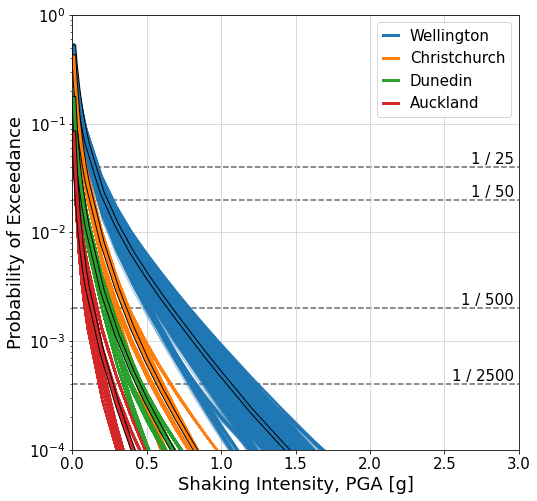

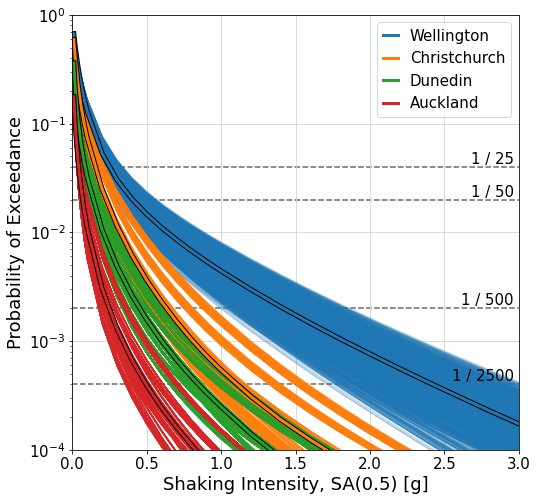

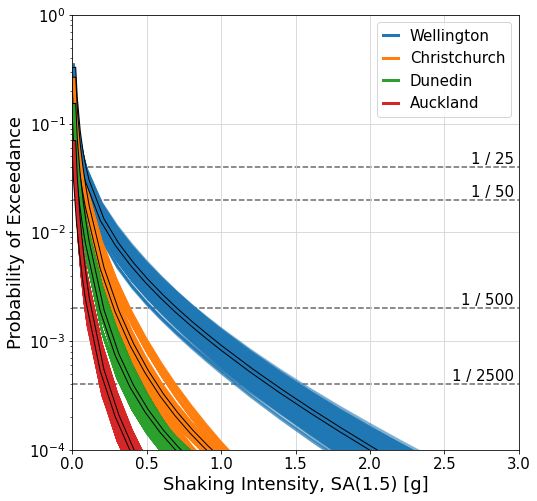

In [30]:
for imt in imts_for_plotting:
        
    fig,ax = plt.subplots(1,1,figsize=figsize)
    plot_hazard_curve(ax,sites_for_plotting,imt,ref_rps,xlim,ylim,results,intensity_type=intensity_type)
    
    figname = 'hazard-curves'
    _ = plt.savefig(Path(fig_folder,f'{imt}',figname+'.pdf'), bbox_inches='tight', pad_inches=0.1)
    _ = plt.savefig(Path(fig_folder,f'{imt}',figname+'.png'), dpi=500, bbox_inches='tight', pad_inches=0)
    _ = plt.show()


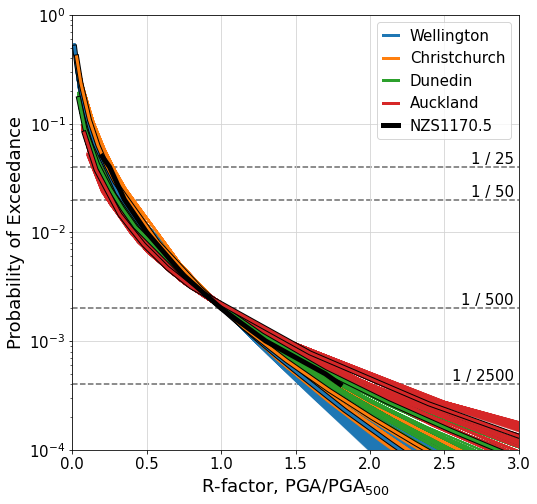

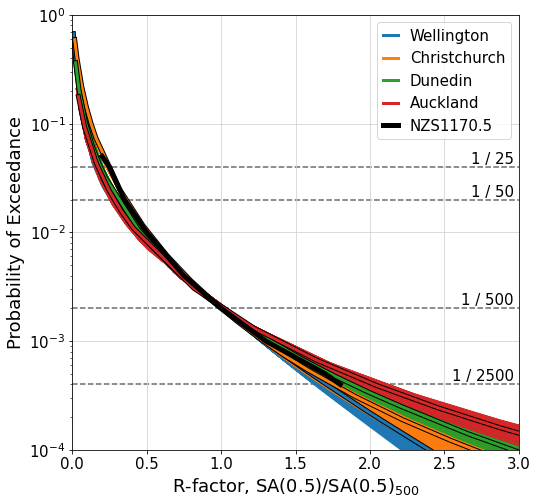

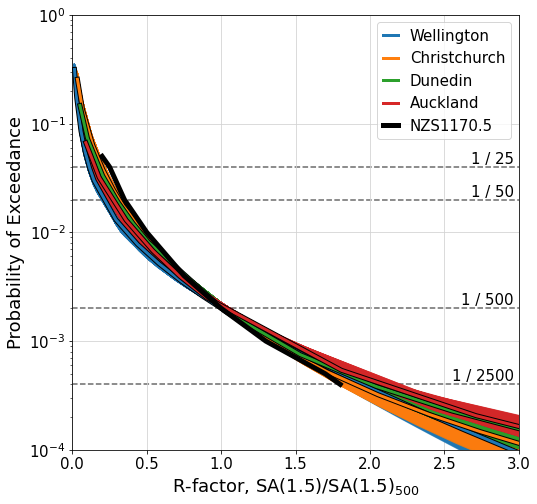

In [31]:
for imt in imts_for_plotting:
    fig,ax = plt.subplots(1,1,figsize=figsize)
    plot_rfactor_curve(ax,sites_for_plotting,imt,ref_rps,xlim,ylim,results,intensity_type=intensity_type)
    
    figname = 'rfactor-curves'
    _ = plt.savefig(Path(fig_folder,f'{imt}',figname+'.pdf'), bbox_inches='tight', pad_inches=0.1)
    _ = plt.savefig(Path(fig_folder,f'{imt}',figname+'.png'), dpi=500, bbox_inches='tight', pad_inches=0)
    _ = plt.show()
    